# 01 - Introdução a SuperComputação

Como vimos na expositiva, uma solução de alto desempenho depende de três partes:

1. algoritmos eficientes
2. implementações eficientes
3. paralelismo

Na atividade de hoje vamos estudar o primeiro ponto e quantificar o efeito de algoritmos eficientes na resolução de um problema complexo.

## Problemas estudados em SuperComputação

Em Desafios de Programação conhecemos a classe dos problemas NP-completo, que são aqueles que acreditamos não existir nenhum algoritmo determinístico que os resolvem em tempo polinomial. Ou seja, são problemas importantes cuja solução é difícil. Em geral temos classes de algoritmos para resolvê-los:

1. ótimos globais: algoritmo que encontra a solução "correta" do problema.
2. ótimos locais: algoritmo que encontra uma solução "boa" e que não pode ser melhorada por pequenas modificações.
3. aproximação: algoritmos que garantem estar "perto o suficiente" da solução ótima. Este tipo de algoritmo não nos interessa em SuperComputação.

Iremos analisar hoje 4 executáveis que resolvem o problema do [Caixeiro Viajante](https://en.wikipedia.org/wiki/Travelling_salesman_problem).

1. `busca-local-1` - implementação de um método de busca rápida, porém não ótima.
1. `busca-local-1-par` - implementação paralela do programa acima.
2. `busca-local-2` - implementação alternativa do mesmo método acima. Os resultados de ambos são idênticos.
2. `busca-local-2-par` - implementação paralela do programa acima.

!!! important
    Não estamos interessados no Caixeiro Viajante em si hoje. Queremos é comparar diferentes maneiras de resolvê-lo para entendermos o papel de técnicas de SuperComputação na velocidade de processamento e nos resultados obtidos.


## Ferramental

Realizar testes de maneira automatizada é muito importante para quantificar os efeitos de diferentes algoritmos e técnicas de paralelismo. O snippet abaixo executa

In [61]:
!rm -rf supercomp
!rm -rf 01-introducao
!git clone --depth 1 --branch master --no-checkout https://github.com/matheus-1618/supercomp.git
!cd supercomp&&git sparse-checkout set material/aulas/01-introducao
!cd supercomp&&git checkout master
!mv supercomp/material/aulas/01-introducao/entradas-busca-local .
!mv supercomp/material/aulas/01-introducao/* .
!rm -rf supercomp

Cloning into 'supercomp'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 194 (delta 4), reused 143 (delta 3), pack-reused 0
Receiving objects: 100% (194/194), 26.13 MiB | 32.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Already on 'master'
Your branch is up to date with 'origin/master'.
mv: cannot move 'supercomp/material/aulas/01-introducao/entradas-busca-local' to './entradas-busca-local': Directory not empty
mv: cannot move 'supercomp/material/aulas/01-introducao/entradas-busca-local' to './entradas-busca-local': Directory not empty


In [62]:
import subprocess
import time

with open('entradas-busca-local/in-0.txt') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./busca-local-1'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

Saída: 232.234 0
3 0 4 1 2 

Stderr: 
Tempo total(s): 0.003837938000287977


Vamos agora praticar usar este snippet para executar nossos testes automaticamente.

!!! example

    Crie uma função `roda_com_entrada(executavel, arquivo_in)` que roda o primeiro argumento usando como entrada o conteúdo do segundo argumento. Teste seu código com o executável `busca-local-1` e com o arquivo de entrada `in-0.txt` usado no exemplo acima.

    Sua função deverá devolver uma tupla `(stdout,time)` com `stdout` sendo a saída do programa e `time` seu tempo de execução em segundos.

In [67]:
# TODO: exercício aqui
def roda_com_entrada(exe,file_in):
  with open(file_in) as f:
      start = time.perf_counter()
      proc = subprocess.run([exe], input=f.read(), text=True, capture_output=True)
      end = time.perf_counter()
      return (proc.stdout,end-start)

print(roda_com_entrada('./busca-local-1','entradas-busca-local/in-0.txt'))

('232.234 0\n3 0 4 1 2 \n', 0.005009843999687291)


## Algoritmos sequenciais

Com esse código, vamos criar um relatório interativo que roda nossos testes automaticamente e já plota informações prontas para nossas análises. Vamos começar examinando o desempenho do executável `busca-local-1`.

!!! example

    Rode o `busca-local` com os arquivos de entrada na pasta `entradas-busca-local`. Guarde os tempos em uma lista.

!!! example

    Leia o tamanho das entradas dos arquivos  na pasta `entradas-busca-local` e guarde em uma segunda lista.

!!! example

    Plote o tempo de execução pelo tamanho da entrada usando `matplotlib`

Saida:	Filename:in-0.txt'
Saida:	Filename:in-1.txt'
Saida:	Filename:in-2.txt'
Saida:	Filename:in-3.txt'
Saida:	Filename:in-4.txt'
Saida:	Filename:in-5.txt'
Saida:	Filename:in-6.txt'
Saida:	Filename:in-7.txt'
Saida:	Filename:in-8.txt'
Saida:	Filename:in-9.txt'


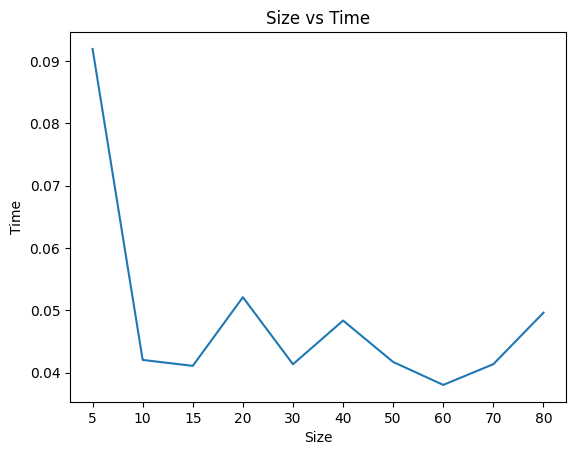

In [70]:
# TODO: exercício aqui
import os
times = []
sizes = []
directory = 'entradas-busca-local'
for i in range(0,10):
  with open(f'entradas-busca-local/in-{i}.txt') as f:
      sizes.append(f.read().split("\n")[0])
      start = time.perf_counter()
      proc = subprocess.run(['./busca-local-1'], input=f.read(), text=True, capture_output=True)
      end = time.perf_counter()
      print(f"Saida:{proc.stdout}\tFilename:in-{i}.txt'")
      times.append(end-start)

import matplotlib.pyplot as plt
plt.plot(sizes,times)
plt.title("Size vs Time")
plt.xlabel("Size")
plt.ylabel("Time")
plt.show()


!!! example
    Repita os três passos acima para o executável `busca-local-2`. Finalize plotando os tempos de execução de ambos os executáveis no mesmo gráfico.

Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-0.txt
Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-1.txt
Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-2.txt
Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-3.txt
Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-4.txt
Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-5.txt
Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-6.txt
Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-7.txt
Saida:CompletedProcess(args=['./busca-local-2'], returncode=-11, stdout='', stderr='')	Filename:in-8.txt


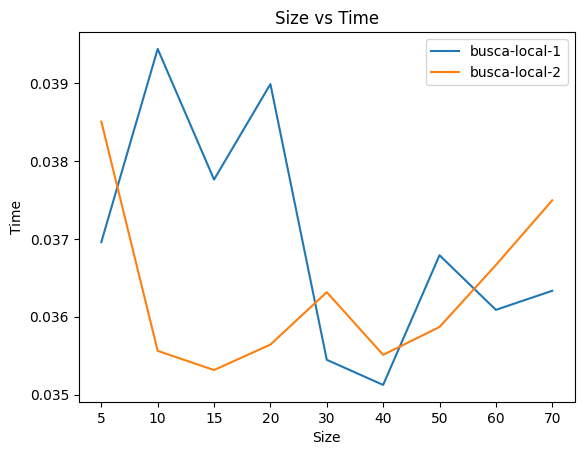

In [69]:
#TODO: seu código aqui
# TODO: exercício aqui
import os
times2 = []
sizes2 = []
for i in range(0,9):
  with open(f'entradas-busca-local/in-{i}.txt') as f:
      sizes2.append(f.read().split("\n")[0])
      start = time.perf_counter()
      proc = subprocess.run(['./busca-local-2'], input=f.read(), text=True, capture_output=True)
      end = time.perf_counter()
      print(f"Saida:{proc}\tFilename:in-{i}.txt")
      times2.append(end-start)

import matplotlib.pyplot as plt
plt.plot(sizes,times,label="busca-local-1")
plt.plot(sizes2,times2,label="busca-local-2")
plt.title("Size vs Time")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend()
plt.show()

!!! example
    Segundo uma coleta de dados informal e altamente confiável, 93,17% dos alunos não colocam legendas nem títulos nos gráficos gerados. Faça isso agora.

!!! question medium

    Interprete o gráfico que você gerou na linha de cima.

!!! question medium
    Compare manualmente a saída dos programas. Existe diferença em seus resultados?

!!! question medium
    Resgate seus conhecimentos de Desafios de Programação e explique a diferença entre os algoritmos.


## Algoritmos paralelos

Na discussão inicial da expositiva chegamos à conclusão de que se conseguimos realizar *N* operações em paralelo teremos um ganho de no máximo *N* vezes no desempenho de nosso programa. Nesta parte iremos estudar esta afirmação usando implementações paralelas dos algoritmos da seção anterior.

!!! example
    Execute os algoritmos paralelos com as mesmas entradas e compare com suas versões paralelas. Use um gráfico para facilitar as comparações

!!! question medium
    Compare os tempos obtidos. Qual foi o ganho médio? Quantos *núcleos* a máquina que você está usando possui? Responda comparando cada algoritmo sequencial com sua versão paralela.

Já estabelecemos que `busca-local-2` é melhor que `busca-local-1` por ser utilizar um algoritmo mais eficiente e vimos na prática a diferença entre um algoritmo $O(n^3)$ e um algoritmo $O(n^2)$. Vamos agora examinar a seguinte questão.

!!! cite "É possível usar paralelismo para tornar `busca-local-1-par` melhor que `busca-local-2`?"

!!! example
    Compare o desempenho de `busca-local-1-par` com `busca-local-2`. Faça um gráfico

!!! question medium
    Com base em seu gráfico acima, responda a pergunta: "É possível usar paralelismo para tornar busca-local-1-par melhor que busca-local-2?"

Vamos agora generalizar a pergunta:

!!! question medium
    Dados dois algoritmos com complexidades computacionais diferentes, sendo que o primeiro é inferior ao segundo. É possível usar paralelismo para tornar o primeiro mais rápido que o segundo para todos tamanhos de entrada? Assuma que você possui um número fixo de *núcleos*.
